In [101]:
# autoreload all packages if changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
!pip3 install sentence-transformers torch scikit-learn matplotlib pandas

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [111]:
import torch


def get_torch_device_name() -> str:
    if torch.cuda.is_available():
        device_name = "cuda"
    elif torch.backends.mps.is_available():
        device_name = "mps"
    else:
        device_name = "cpu"
    return device_name

In [112]:
sentences = [
    "queen",
    "king",
    "prince",
    "princes",
    "man",
    "woman",
    "boy",
    "girl",
    "red",
    "green",
    "blue",
    "palace"
]

In [113]:
from sentence_transformers import SentenceTransformer


def embed(sentences):
    model_name = "all-MiniLM-L6-v2"
    model = SentenceTransformer(
        model_name,
        device=get_torch_device_name(),  # Optional: if you want to run this on GPU
    )
    return model.encode(sentences)


embeddings = embed(sentences)
embeddings

array([[ 0.03548697, -0.06560464, -0.00993495, ..., -0.05388919,
        -0.03124185, -0.08696103],
       [-0.05959935,  0.05051237, -0.0695101 , ..., -0.03039862,
        -0.00108663, -0.0159225 ],
       [-0.0368288 ,  0.04128201,  0.04185658, ..., -0.04652406,
        -0.01228011,  0.02392111],
       ...,
       [-0.03772396,  0.06687669, -0.03187751, ..., -0.0379608 ,
         0.06624561,  0.03243417],
       [-0.06580832,  0.02037648, -0.05504948, ...,  0.0103435 ,
        -0.01987195,  0.03875798],
       [ 0.05195446,  0.03574972, -0.10686448, ...,  0.03114814,
         0.01272161, -0.06015847]], dtype=float32)

In [114]:
import pandas as pd

pd.DataFrame({
    "Sentence": sentences,
    "Encoding": list(embeddings)
})

,Sentence,Encoding
0,queen,"[0.035486974, -0.06560464, -0.009934947, 0.031..."
1,king,"[-0.05959935, 0.050512373, -0.0695101, 0.07968..."
2,prince,"[-0.036828797, 0.041282006, 0.04185658, 0.0417..."
3,princes,"[-0.02193416, 0.012083578, -0.004359563, -0.00..."
4,man,"[-0.109675646, 0.043741878, -0.026319038, -0.0..."
5,woman,"[-0.04559169, 0.011334585, -0.019113125, 0.044..."
6,boy,"[-0.12977691, 0.053209268, -0.027111193, -0.03..."
7,girl,"[-0.053530373, 0.006072233, -0.005353907, 0.00..."
8,red,"[-0.025091544, 0.008846337, -0.100836895, 0.01..."
9,green,"[-0.037723962, 0.06687669, -0.031877514, -0.02..."


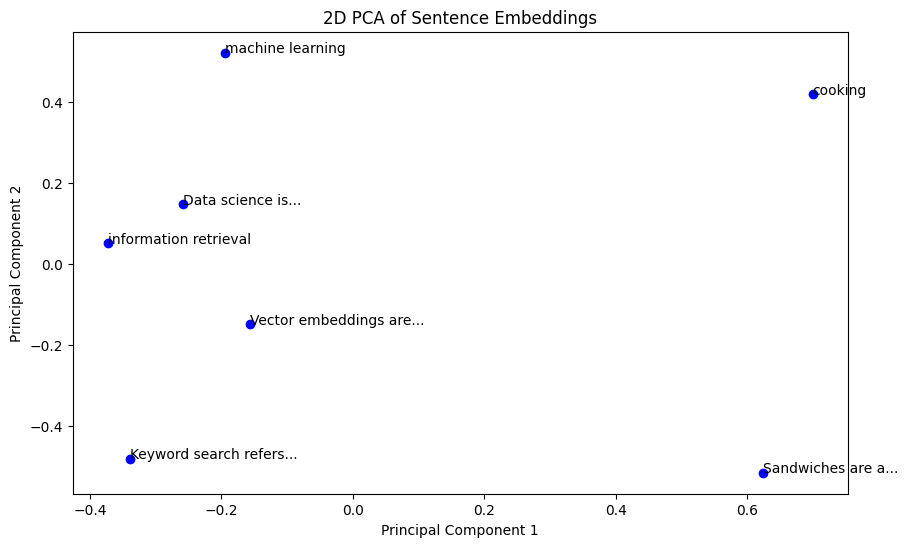

In [119]:
from sklearn.decomposition import PCA


def plot(sentences, embeddings):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue')
    for i, sentence in enumerate(sentences):
        words = sentence.split()
        annotation = ' '.join(words[:3]) + ('...' if len(words) > 3 else '')
        plt.annotate(annotation, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D PCA of Sentence Embeddings")
    plt.show()


plot(sentences, embeddings)

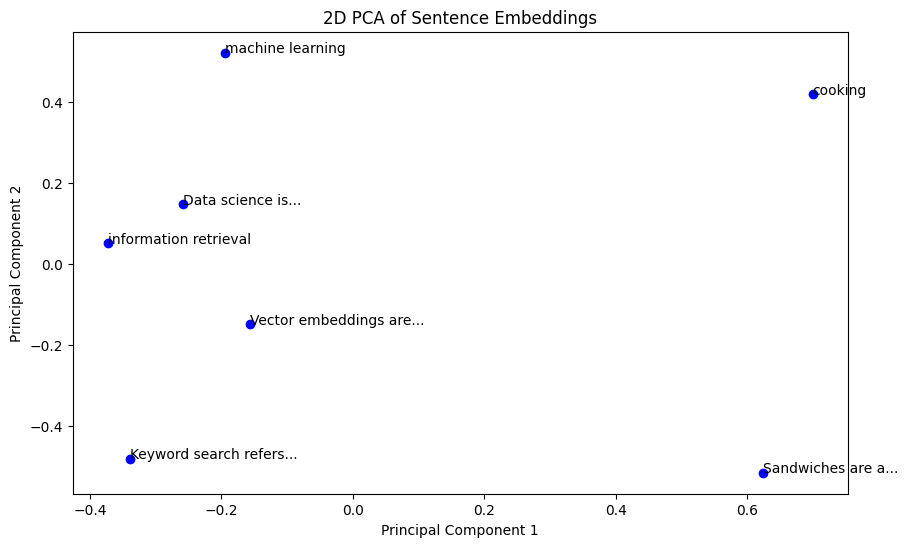

In [117]:
sentences = [
    "Vector embeddings are mathematical representations of objects, often words or phrases, in a high-dimensional space. By mapping similar objects to proximate points, embeddings capture relationships and semantic meaning. Commonly used in machine learning and natural language processing tasks, methods like Word2Vec, GloVe, and FastText have popularized their application, enabling advancements in text analysis, recommendation systems, and more.",
    "Keyword search refers to the process of locating information in a database, search engine, or other data repository by specifying particular words, phrases, or symbols. In the digital realm, it's foundational to search engines like Google and Bing. The search results are typically ranked based on relevance, which is determined using various algorithms that consider factors like frequency, location, and link structures. Keyword search is integral for navigating the vast expanse of online information, aiding users in retrieving relevant data efficiently.",
    "Sandwiches are a popular type of food consisting of one or more types of food, such as vegetables, sliced meat, or cheese, placed between slices of bread. They can range from simple combinations like peanut butter and jelly to more complex gourmet creations. Originating from England in the 18th century, sandwiches have become a staple in many cultures worldwide, prized for their convenience and versatility. Variations exist based on regional preferences, ingredients, and preparation methods.",
    "Data science is an interdisciplinary field that leverages statistical, computational, and domain-specific expertise to extract insights and knowledge from structured and unstructured data. It encompasses various techniques from statistics, machine learning, data mining, and big data technologies to analyze and interpret complex data. Data science has applications across numerous sectors, including healthcare, finance, marketing, and social sciences, driving decision-making, predictive analytics, and artificial intelligence advancements. Its growing significance in today's data-driven world has led to the rise of specialized tools, methodologies, and educational programs.",
    "information retrieval",
    "machine learning",
    "cooking",
]
embeddings = embed(sentences)
plot(sentences, embeddings)